In [1]:
pd.set_option('display.max_columns', 500)

In [11]:
print(packages_import_statement)

import statsmodels.formula.api as smf
import statsmodels.api as sm
import geopandas as gpd


import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os

import re
import time 

from pprint import pprint




In [3]:
for direc, _, files in os.walk("../modeling_data"):
    for f in files:
        if ".csv" in f:
            print(f"{direc}/{f}")

../modeling_data/Xs__PerCapitaWastePostLockdown.csv
../modeling_data/Y__Diversion_RateChange.csv
../modeling_data/Xs__PerCapitaWastePreLockdown.csv
../modeling_data/Xs__SNAP2020Data.csv
../modeling_data/Xs_ACS_DemoData.csv
../modeling_data/Xs_ACS_EconData.csv
../modeling_data/Xs_AllInputs.csv
../modeling_data/Xs__SNAP2019Data.csv
../modeling_data/Xs__FurmanCenterCD_Data.csv


In [4]:
##target variable
diversion_ratechange = pd.read_csv("../modeling_data/Y__Diversion_RateChange.csv")

## input variables_CENSUS
demos = pd.read_csv("../modeling_data/Xs_ACS_DemoData.csv")
econs = pd.read_csv("../modeling_data/Xs_ACS_EconData.csv")

In [5]:
modeling_df = diversion_ratechange.merge(demos,on='communitydistrict_index',how='left').merge(econs,on='communitydistrict_index',how='left').set_index("communitydistrict_index")
modeling_df

,Change_Diversion_Rate_PostLockdown,pop_under_18,pop_over_65,white_alone,black_alone,hispanic,asian_alone,other_race_alone,num_employed,num_unemployed,hh_inc<10K,hh_inc10-14K,hh_inc15-24K,hh_inc25-34K,hh_inc35-49K,hh_inc50-74K,hh_inc75-99K,hh_inc100-149K,hh_inc150-199K,hh_inc>200K,hh_with_snap_past12mos,num_eployed_info_sector,num_eployed_fire_sector,num_eployed_sciences_waste_sector,num_eployed_educhealthsocial_sector,num_eployed_artsentertainmentfoood_sector,num_eployed_other_sector,num_eployed_publicadmin_sector
communitydistrict_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1__01,0.004018,19724,19926,111981,4395,10469,23956,703,97888,3983,3470,1976,3358,2755,4030,6605,6340,12171,8739,28196,2923,7529,22910,26612,15540,8072,2696,1588
1__02,-0.013964,19724,19926,111981,4395,10469,23956,703,97888,3983,3470,1976,3358,2755,4030,6605,6340,12171,8739,28196,2923,7529,22910,26612,15540,8072,2696,1588
1__03,0.019971,17670,27671,51603,12980,38899,47412,270,74614,5011,9411,7644,8673,6103,6699,8499,5740,8218,3845,7000,18426,5117,8477,16141,15292,10602,3336,1667
1__04,0.002876,12663,20752,91370,8077,23906,26538,885,102855,5031,6564,3860,5820,4565,5384,8410,7663,13055,8993,23598,7455,8470,23020,25287,14924,10024,3503,2221
1__05,0.007083,12663,20752,91370,8077,23906,26538,885,102855,5031,6564,3860,5820,4565,5384,8410,7663,13055,8993,23598,7455,8470,23020,25287,14924,10024,3503,2221
1__06,0.006133,12982,26775,102427,5004,10710,24337,667,95339,3325,3642,2231,3867,3192,4814,9007,7522,13376,9287,23201,2263,6514,21410,25325,17204,5973,3455,2908
1__07,0.002741,30218,40322,133011,11477,28962,17905,907,110603,5580,6223,3364,5201,4754,5362,9564,8525,14956,9972,30191,6600,8180,20580,26138,26777,8727,3737,2727
1__08,0.011092,31369,44862,162173,4953,20847,22000,332,127749,3740,4793,2192,5121,4140,6094,13365,12167,18491,11228,34603,3343,8855,28364,27523,30016,7137,4899,3036
1__09,0.011422,19528,16096,35763,27879,50196,11341,453,63231,4263,6107,3677,4320,4393,4780,6392,4845,5565,2535,4542,9597,3307,4698,8243,19677,10485,3611,1386


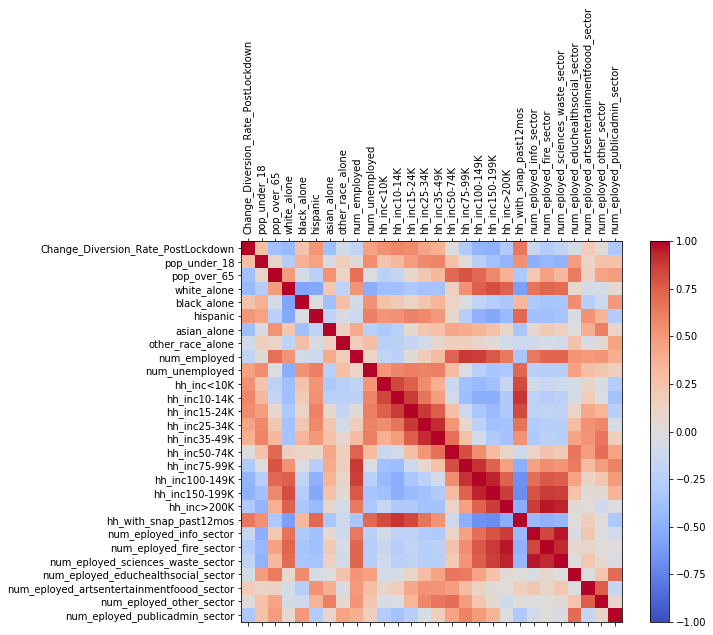

In [6]:
corr = modeling_df.corr()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(modeling_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(modeling_df.columns)
ax.set_yticklabels(modeling_df.columns)
plt.show()

In [9]:
req_eq_string="Change_Diversion_Rate_PostLockdown~"
for c in modeling_df.columns[1:]:
    req_eq_string+=f"{c}+"
    
print(req_eq_string[:-1])

Change_Diversion_Rate_PostLockdown~pop_under_18+pop_over_65+white_alone+black_alone+hispanic+asian_alone+other_race_alone+num_employed+num_unemployed+hh_inc<10K+hh_inc10-14K+hh_inc15-24K+hh_inc25-34K+hh_inc35-49K+hh_inc50-74K+hh_inc75-99K+hh_inc100-149K+hh_inc150-199K+hh_inc>200K+hh_with_snap_past12mos+num_eployed_info_sector+num_eployed_fire_sector+num_eployed_sciences_waste_sector+num_eployed_educhealthsocial_sector+num_eployed_artsentertainmentfoood_sector+num_eployed_other_sector+num_eployed_publicadmin_sector


In [19]:
# req_eq_string[:-1]
modeling_df['const']=1
model = sm.OLS(modeling_df['Change_Diversion_Rate_PostLockdown'], modeling_df.drop('Change_Diversion_Rate_PostLockdown',axis=1),hasconst=True).fit()
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Change_Diversion_Rate_PostLockdown   R-squared:                       0.705
Model:                                            OLS   Adj. R-squared:                  0.447
Method:                                 Least Squares   F-statistic:                     2.738
Date:                                Sat, 28 Nov 2020   Prob (F-statistic):            0.00383
Time:                                        09:31:13   Log-Likelihood:                 207.62
No. Observations:                                  59   AIC:                            -359.2
Df Residuals:                                      31   BIC:                            -301.1
Df Model:                                          27                                         
Covariance Type:                            nonrobust                                         
                                                co

In [ ]:
model.